In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from analoguesplit import (analogue_split, calculate_fp, tanimoto_similarity, convert_smiles_to_mol, calculate_simmat, train_and_evaluate_models, plot_evaluation_results)
from topotree import TopologicalDecisionTreeClassifier
from tqdm import tqdm

/Users/manasmahale/Library/Caches/pypoetry/virtualenvs/topotree-olFDovYg-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [3]:
paths = [f"../data/simpd/{i}" for i in os.listdir("../data/simpd/")]

In [4]:
paths = sorted(paths, key=lambda x:pd.read_csv(x).shape[0])

In [5]:
gammas = [i/10 for i in range(11)]
omega = 0.5
test_size = 0.2
seed = 69420

In [6]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Topological Decision Tree": TopologicalDecisionTreeClassifier()
}

In [7]:
import joblib
eval_results = joblib.load("results_simpd_eval.joblib")

In [8]:
# Organize the data
datasets = {}
for key, val in eval_results.items():
    dataset_name, gamma, model_name = key.split('_')
    if dataset_name not in datasets:
        datasets[dataset_name] = {}
    if model_name not in datasets[dataset_name]:
        datasets[dataset_name][model_name] = {}
    datasets[dataset_name][model_name][gamma] = val

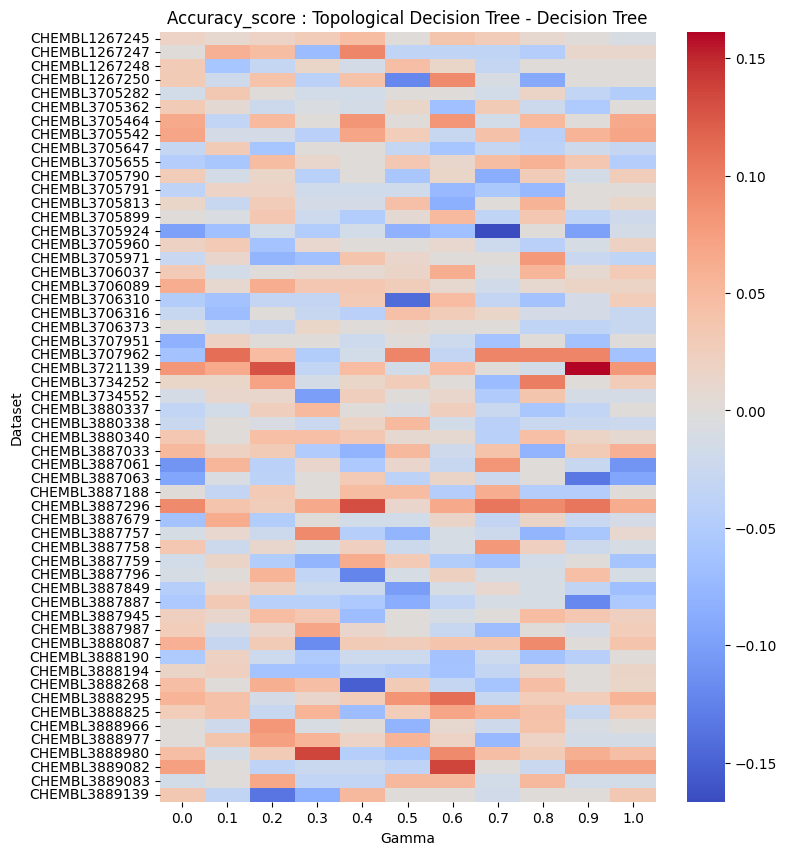

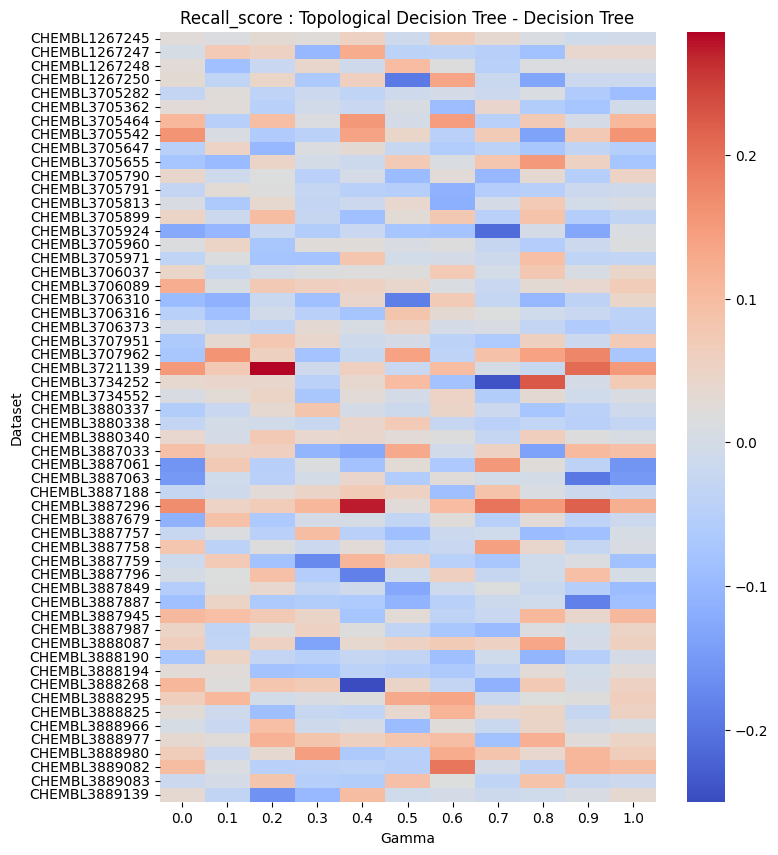

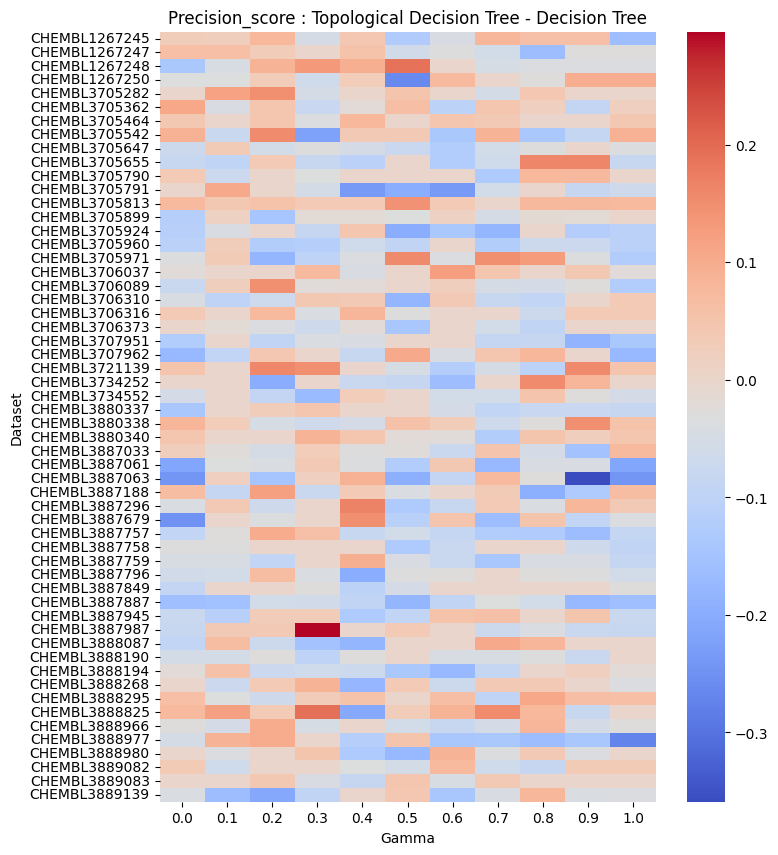

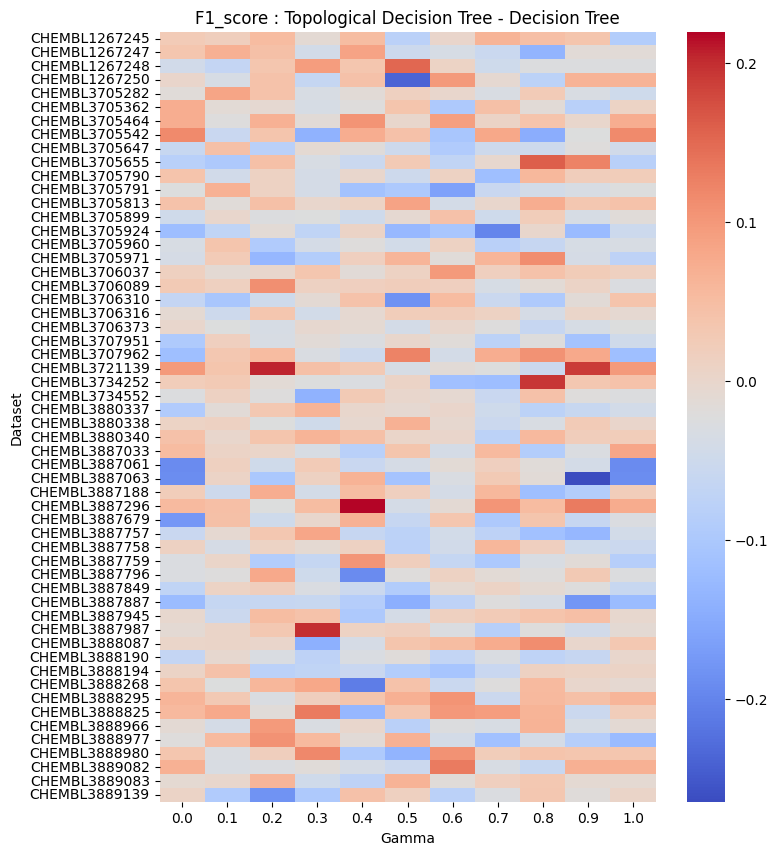

In [10]:
for n_, metric in enumerate(['accuracy_score', 'recall_score', 'precision_score', 'f1_score']):
    # Compute the differences
    diff_data = {}
    for dataset_name, models in datasets.items():
        model1, model2 = 'Topological Decision Tree', 'Decision Tree'
        if dataset_name not in diff_data:
            diff_data[dataset_name] = {}
        for gamma in models[model1]:
            if gamma in models[model2]:
                diff_data[dataset_name][gamma] = models[model1][gamma][n_] - models[model2][gamma][n_]
                    
    # Prepare data for plotting
    data = []
    gammas = sorted({gamma for model in datasets.values() for gamma in next(iter(model.values())).keys()})
    datasets_sorted = sorted(diff_data.keys())
    
    for dataset in datasets_sorted:
        row = []
        for gamma in gammas:
            row.append(diff_data[dataset].get(gamma, np.nan))
        data.append(row)
    
    # Plotting
    plt.figure(figsize=(8, 10))
    ax = sns.heatmap(data, annot=False, cmap='coolwarm', xticklabels=gammas, yticklabels=datasets_sorted)
    ax.set_xlabel('Gamma')
    ax.set_ylabel('Dataset')
    ax.set_title(f'{metric.capitalize()} : Topological Decision Tree - Decision Tree')
    plt.show()

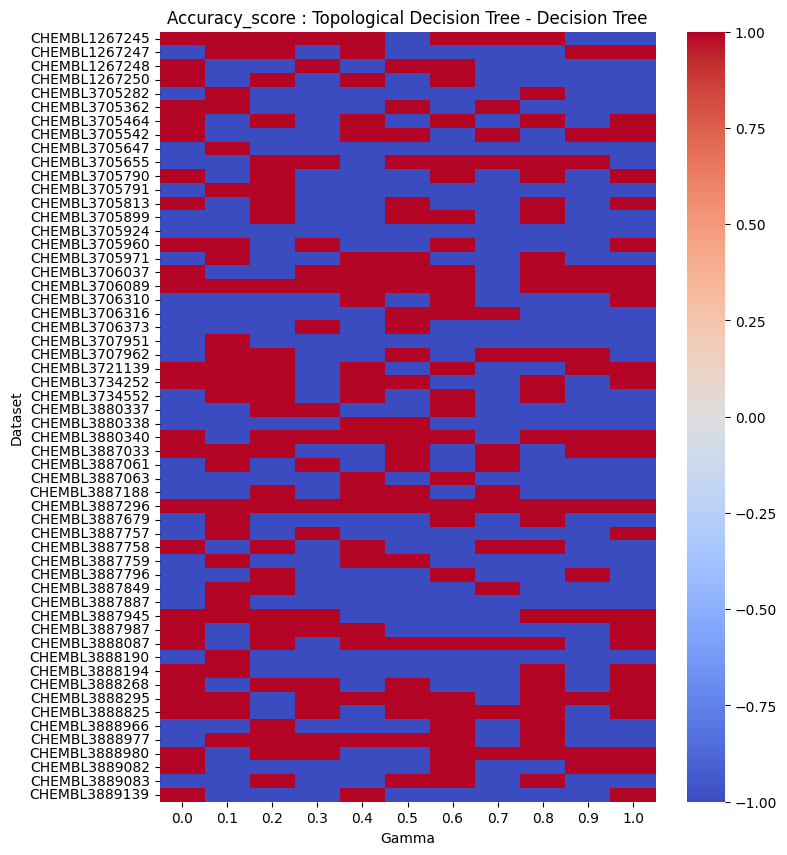

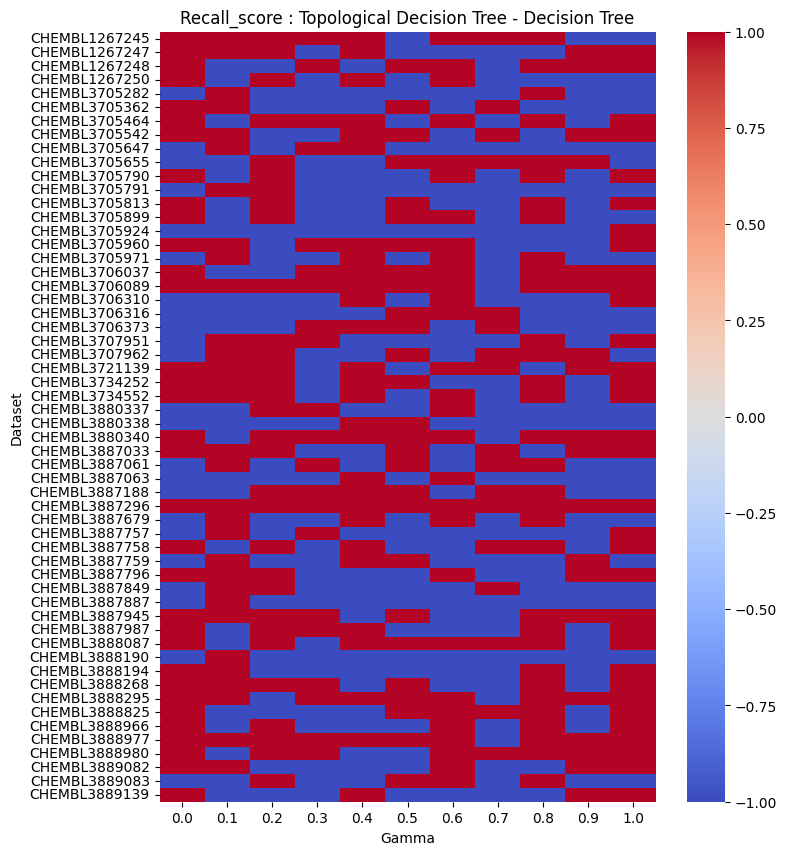

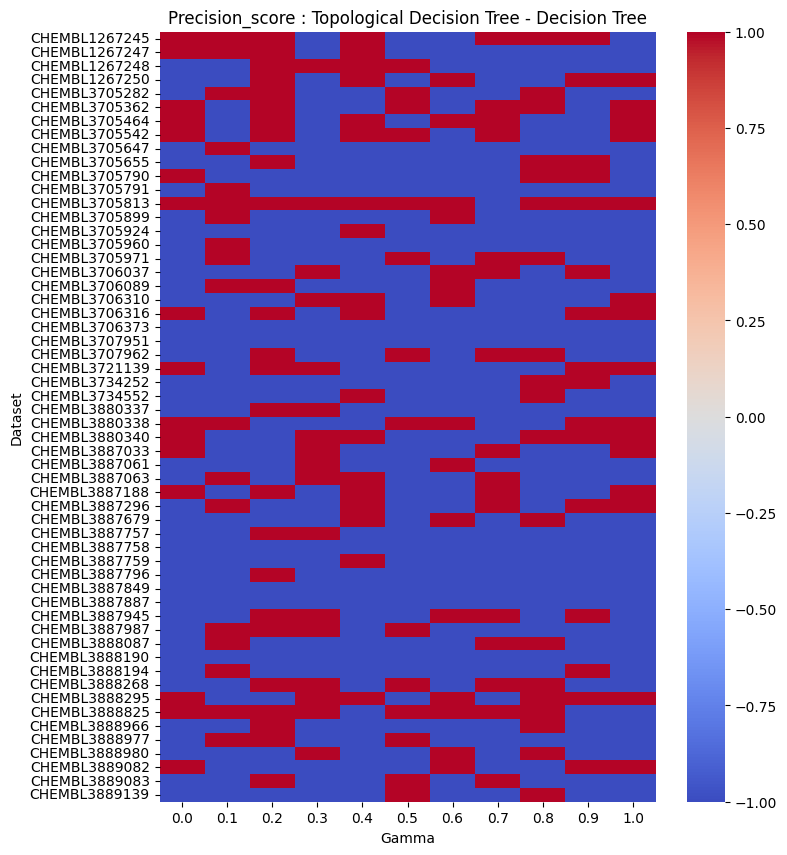

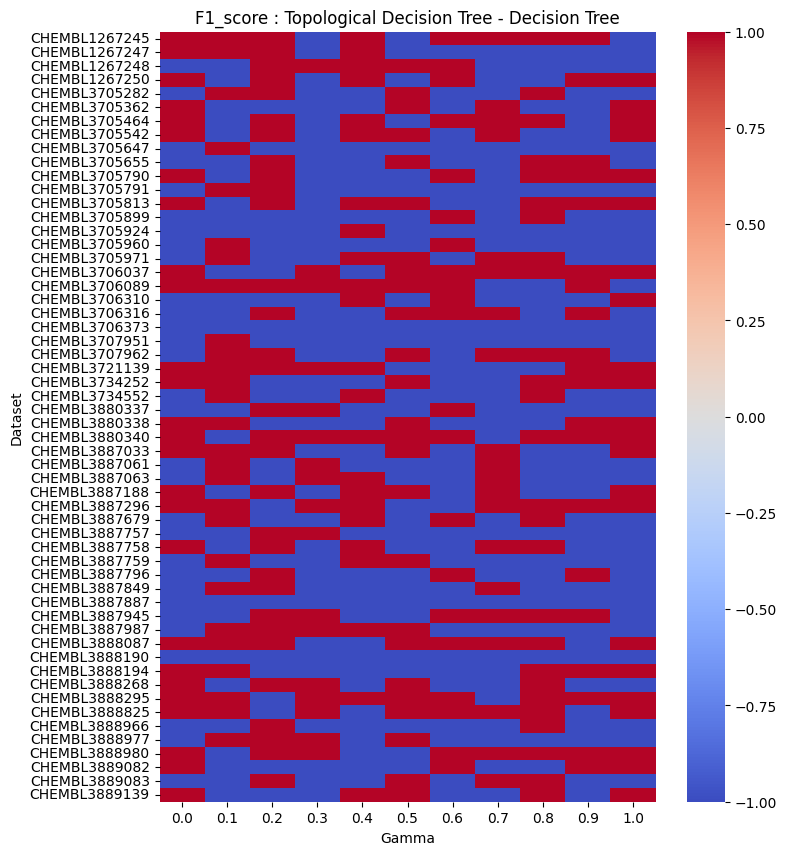

In [9]:
for n_, metric in enumerate(['accuracy_score', 'recall_score', 'precision_score', 'f1_score']):
    # Compute the differences
    diff_data = {}
    for dataset_name, models in datasets.items():
        model1, model2 = 'Topological Decision Tree', 'Decision Tree'
        if dataset_name not in diff_data:
            diff_data[dataset_name] = {}
        for gamma in models[model1]:
            if gamma in models[model2]:
                if models[model1][gamma][n_] - models[model2][gamma][n_] > 0:
                    diff_data[dataset_name][gamma] = 1
                else:
                    diff_data[dataset_name][gamma] = -1
                    
    # Prepare data for plotting
    data = []
    gammas = sorted({gamma for model in datasets.values() for gamma in next(iter(model.values())).keys()})
    datasets_sorted = sorted(diff_data.keys())
    
    for dataset in datasets_sorted:
        row = []
        for gamma in gammas:
            row.append(diff_data[dataset].get(gamma, np.nan))
        data.append(row)
    
    # Plotting
    plt.figure(figsize=(8, 10))
    ax = sns.heatmap(data, annot=False, cmap='coolwarm', xticklabels=gammas, yticklabels=datasets_sorted)
    ax.set_xlabel('Gamma')
    ax.set_ylabel('Dataset')
    ax.set_title(f'{metric.capitalize()} : Topological Decision Tree - Decision Tree')
    plt.show()